In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [180]:
#2?
mass = []
t1 = []
t2 = []
t3 = []
t4 = []
filename='f1-b.csv'
datafile=open(filename,"r")

In [181]:
for line in datafile:
    
    if line.startswith('#'):
        continue
    
    line1 = line.replace(':',',').split(',')
    mass.append(float(line1[1]))
    t1.append(float(line1[3]))
    t2.append(float(line1[4]))    
    t3.append(float(line1[5]))
    t4.append(float(line1[6]))

datafile.close()

ta = []
ta.append([t1[0],t2[0],t3[0],t4[0]])
ta.append([t1[1],t2[1],t3[1],t4[1]])
ta.append([t1[2],t2[2],t3[2],t4[2]])
ta.append([t1[3],t2[3],t3[3],t4[3]])

In [182]:
x_vals = []  # This will hold all the x values (masses)
y_vals = []  # This will hold all the y values (times)

for i in range(len(masses)):
    for a in ta[i]:
        x_vals.append(masses[i])
        y_vals.append(a)
avgt = []       
for i in range(len(ta)):
    avgt.append(sum(ta[i]) / len(ta[i]))

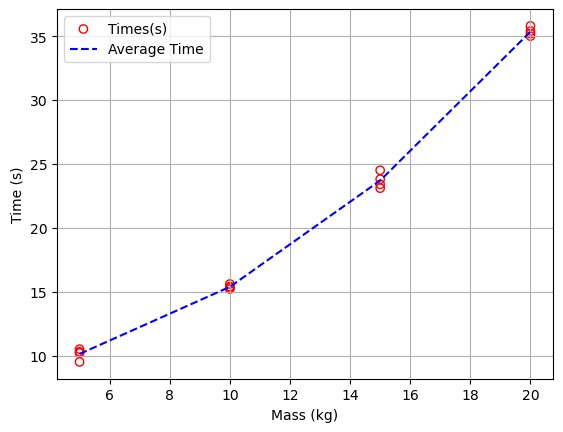

In [185]:
plt.scatter(x_vals, y_vals, facecolors='none', edgecolors='red', marker='o',label='Times(s)')
plt.plot(masses, avgt, 'b--', label='Average Time')
plt.xlabel('Mass (kg)')
plt.ylabel('Time (s)')
plt.grid(True)
plt.legend()

In [186]:
import sys
print(sys.argv)

a=1
b=1
c=5
x1 = (-1.0*b - (b*b-4.0*a*c)**0.5 )/(2.0*a)
x2 = (-1.0*b + (b*b-4.0*a*c)**0.5 )/(2.0*a)
print("solving equation %.2f x^2 + %.2f x + %.2f = 0"%(a,b,c)) 
print("x1 = ",x1)
print("x2 = ",x2)


['C:\\Users\\jcumm\\anaconda3\\Lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\jcumm\\AppData\\Roaming\\jupyter\\runtime\\kernel-593e8ed5-255e-4573-a925-ae277d372eb2.json']
solving equation 1.00 x^2 + 1.00 x + 5.00 = 0
x1 =  (-0.5000000000000001-2.179449471770337j)
x2 =  (-0.4999999999999999+2.179449471770337j)


In [189]:
# Ranger 7 mission
# Nathan Moore's work
import math
import numpy as np
import matplotlib.pyplot as plt

# constants
G=6.67e-11 
m_earth=5.98e24 # kg (Earth's mass)
m_ranger= 10000 # kg (mass of rocket)
m_moon=7.35e22 # kg (moon's mass)
r_earth=6.388e6 # m (radius of Earth)
r_moon_earth=3.844e8 # m (distance from Earth to moon)
r_moon=1740e3 #m
# determine the point of no return via gravitational force balance
a=1.0-(m_moon/m_earth)
b=-2.0*r_moon_earth
c=r_moon_earth**2
r_point_of_no_return = (-b-math.sqrt(b**2-4*a*c))/(2.0*a)

#simulation parameters and controls
t1=0
dt=6.0e1 # (s)
t_limit = 3*24*3600 # (s) 
r1 = r_earth + 50e3
v1 = 11.0e3 # m/s velocity at engine flameout
verbose_output = 1

#############################
# parse inputs from command-line
# this could change the defaults (above)
import sys
for i in range(len(sys.argv)):
    # look for keywords and set simulation variables if
    # they are supplied.
    if(sys.argv[i] == "v0") :
        v0 = float(sys.argv[i+1])
        v1=v0
    if(sys.argv[i] == "t_limit_seconds") :
        t_limit = float(sys.argv[i+1])
    if(sys.argv[i] == "t_limit_hours") :
        t_limit = float(sys.argv[i+1])*3600
    if(sys.argv[i] == "t_limit_days") :
        t_limit = float(sys.argv[i+1])*24*3600
    if(sys.argv[i] == "quiet_output") :
        verbose_output = 0

# done parsing inputs
##########################################

def print_state(t,r,v):
    print("t = %.2e (s)\tr = %.2e (m)\tv = %.2e (m/s)"%(t,r,v))

if(verbose_output==1) :
    print("simulation starts:")
    print_state(t1,r1,v1)    

# these are the lists of numbers I can't re-create when the simulation is done.  
# saved for plotting after sim is done
v_2s=[v1]
r_2s=[r1]
t_2s=[t1]

# I'm using the "Velocity-Verlet" integrator so I need a second initial state points
F1 = -G*m_earth*m_ranger/r1**2 + G*m_moon*m_ranger/(r_moon_earth-r1)**2
a1 = F1/m_ranger
v2 = v1 + a1*dt
r2 = r1 + v1*dt + 0.5*a1*dt*dt
t2 = t1 + dt

if(verbose_output==1) :
    print_state(t2,r2,v2)

# repeat DiffEq solver procedure many many times to get an approximate model for the motion
stop_simulation = 0
passed_point_of_no_return=0
while (stop_simulation == 0) :
    
    # compute force (i=2), based on (i=2) position (but not velocity, because Verlet...)
    F2 = -G*m_earth*m_ranger/r2**2 + G*m_moon*m_ranger/(r_moon_earth-r2)**2
    a2 = F2/m_ranger
    
    # apprimately solve differential equation over a very short time interval
    # using the "Velocity Verlet" DEQ integrator
    # r3 = new position, i+1
    # r2 = current position, i
    # r1 = old position, i-1
    r3 = 2.0*r2 - r1 + a2*dt*dt
    v2 = (r3 - r1)/(2.0*dt)

    # store the current dynamic values
    v_2s.append(v2)
    r_2s.append(r2)
    t_2s.append(t2)
    
    # update/recycle values for the next loop
    r1 = r2
    r2 = r3
    t2 = t2 + dt

    # checks to see if the simulation should keep going:
    if( r2<r_earth ) :

        if(verbose_output==1) :
            print_state(t2,r2,v2)
            print("rocket fell back to earth at t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))
        stop_simulation=1
        stop_condition = "fell_to_earth"
                
    if( t2>t_limit) :
        if(verbose_output==1) :
            print_state(t2,r2,v2)
            print("simulation ran out of time at t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))
        stop_simulation=1
        stop_condition = "ran_out_of_time"
    
    if (passed_point_of_no_return==0 and r2>r_point_of_no_return ) :
        passed_point_of_no_return=1
        if(verbose_output==1) :
            print_state(t2,r2,v2)
            print("passed point of no return at t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))

    if( r2>(r_moon_earth-r_moon) ):
        if(verbose_output==1) :
            print_state(t2,r2,v2)
            print("Ranger probe arrived at moon at  t = %.2e (sec) = %.1f (hours)"%(t2,t2/3600))
        stop_simulation=1
        stop_condition = "arrived_at_Luna"

############## simulation loop is over ##################

# convert simulation data to numpy arrays
t=np.array(t_2s)
r=np.array(r_2s)
v=np.array(v_2s)
# and then create Force, KE, PE arrays
F = -G*m_earth*m_ranger/r**2 + G*m_moon*m_ranger/(r_moon_earth-r)**2
KE = 0.5*m_ranger*v**2
PE = -G*m_earth*m_ranger/r + -G*m_moon*m_ranger/(r_moon_earth-r)

if(verbose_output==1) :
    # make some plots
    plt.plot(r,v)
    plt.title("Ranger 7, via Verlet DEQ Integrator, dt = %.2e (s)"%dt)
    plt.grid()
    plt.xlabel("distance from Earth, r (m)")
    plt.ylabel("speed, v (m/s)")
    plt.tight_layout()
    plt.savefig("verlet_ranger-r-v-plot.pdf")
    plt.savefig("verlet_ranger-r-v-plot.png")
    plt.close()

print("v0(m/s),%.4e,t2(s),%.4e,dt(s),%.4e,%s,"%(v0,t2,dt,stop_condition))


simulation starts:
t = 0.00e+00 (s)	r = 6.44e+06 (m)	v = 1.10e+04 (m/s)
t = 6.00e+01 (s)	r = 7.08e+06 (m)	v = 1.04e+04 (m/s)
t = 2.59e+05 (s)	r = 2.55e+08 (m)	v = -1.54e+02 (m/s)
simulation ran out of time at t = 2.59e+05 (sec) = 72.0 (hours)


NameError: name 'v0' is not defined